In [1]:
import os

print(len(os.listdir(os.path.join("..","dataset", "test1"))))
print(len(os.listdir(os.path.join("..","dataset", "train"))))

12500
25000


In [2]:
import os
import shutil
import pathlib

original_dir = pathlib.Path(os.path.join("..", "dataset", "train"))
new_base_dir = pathlib.Path(os.path.join("..", "dataset", "cats_vs_dogs_small"))


def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)


make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)


FileExistsError: [Errno 17] File exists: '../dataset/cats_vs_dogs_small/train/cat'

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)


In [22]:

x_in = layers.Input((180, 180, 3))
x = data_augmentation(x_in)
x = layers.Rescaling(scale=1./255)(x)
x = layers.Conv2D(32, 3, activation="relu")(x_in)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(256, 3, activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(256, 3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x_out = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=x_in, outputs=x_out)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 41, 41, 128)       7385

In [23]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

In [24]:
from tensorflow.keras.utils import image_dataset_from_directory

image_size = (180, 180)
batch_size = 32
train_dataset = image_dataset_from_directory(
    new_base_dir / "train", 
    image_size=image_size,
    batch_size=batch_size
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation", 
    image_size=image_size,
    batch_size=batch_size    
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test", 
    image_size=image_size,
    batch_size=batch_size    
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [25]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset
)


Epoch 1/100
63/63 [==============================] - 3s 39ms/step - loss: 18.6511 - binary_accuracy: 0.5035 - val_loss: 0.7035 - val_binary_accuracy: 0.4840
Epoch 2/100
63/63 [==============================] - 2s 36ms/step - loss: 0.8233 - binary_accuracy: 0.5250 - val_loss: 1.0461 - val_binary_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 2s 36ms/step - loss: 0.7049 - binary_accuracy: 0.5585 - val_loss: 0.6911 - val_binary_accuracy: 0.5290
Epoch 4/100
63/63 [==============================] - 2s 35ms/step - loss: 0.7379 - binary_accuracy: 0.5685 - val_loss: 0.6961 - val_binary_accuracy: 0.5060
Epoch 5/100
63/63 [==============================] - 2s 35ms/step - loss: 0.6915 - binary_accuracy: 0.6145 - val_loss: 0.8174 - val_binary_accuracy: 0.5220
Epoch 6/100
63/63 [==============================] - 2s 36ms/step - loss: 0.6967 - binary_accuracy: 0.6075 - val_loss: 0.6646 - val_binary_accuracy: 0.6010
Epoch 7/100
63/63 [==============================] - 2s 38ms/st

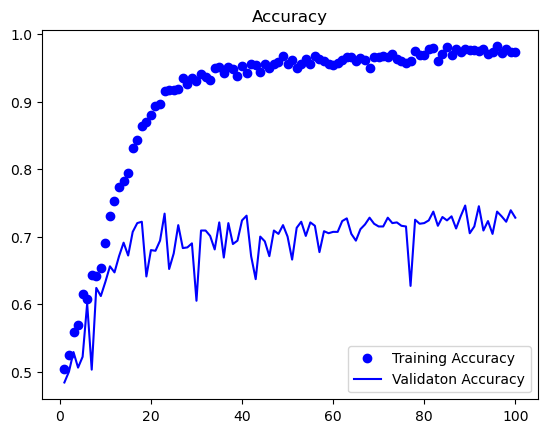

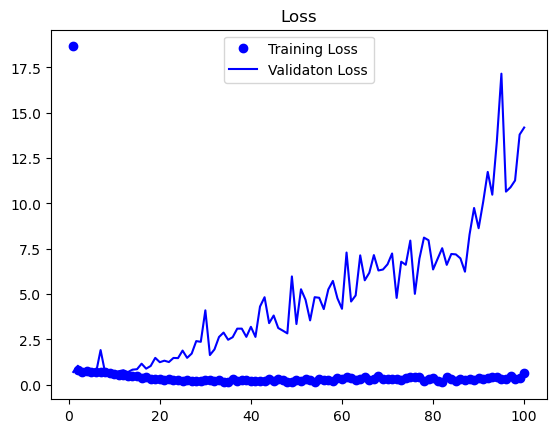

In [28]:
import matplotlib.pyplot as plt

train_loss = history.history["loss"]
train_accuracy = history.history["binary_accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_binary_accuracy"]
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validaton Accuracy")
plt.title("Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validaton Loss")
plt.title("Loss")
plt.legend()
plt.show()